In [21]:
import pandas as pd

df = pd.read_csv('troop_movements.csv')

print(df.head())

             timestamp  unit_id unit_type empire_or_resistance  location_x  \
0  2025-07-08 16:25:07        1     at-at           resistance           3   
1  2025-07-08 16:25:06        2     at-at           resistance           5   
2  2025-07-08 16:25:05        3   unknown               empire           1   
3  2025-07-08 16:25:04        4     at-st           resistance           5   
4  2025-07-08 16:25:03        5   unknown           resistance           9   

   location_y  destination_x  destination_y homeworld  
0           4              5              4   Dagobah  
1           3             10              1    Mirial  
2           5              9             10   Tholoth  
3           3              4              6   Iktotch  
4           3              8              7     Naboo  


In [22]:
#grouped data showing counts of empire vs resistance
print('empire count: ',df['empire_or_resistance'].str.contains('empire', case=False).sum())
print('resistance count: ',df['empire_or_resistance'].str.contains('resistance', case=False).sum())

empire count:  497
resistance count:  503


In [23]:
#grouped data showing counts of characters by homeworld
planets = df['homeworld'].unique()

for planet in planets:
    print(f'{planet}: ',df['homeworld'].str.contains(planet, case=False).sum())

Dagobah:  24
Mirial:  25
Tholoth:  28
Iktotch:  30
Naboo:  23
Toydaria:  28
Haruun Kal:  24
Eriadu:  28
Kashyyyk:  17
Rodia:  30
Bestine IV:  22
Concord Dawn:  25
Aleen Minor:  25
Mon Cala:  22
Stewjon:  20
Tund:  31
Umbara:  18
Dorin:  26
Glee Anselm:  24
Skako:  23
Quermia:  28
Serenno:  23
Sullust:  27
Muunilinst:  27
Champala:  22
Troiken:  22
Kalee:  20
Cerea:  24
Shili:  26
Chandrila:  18
Vulpter:  22
Malastare:  24
Alderaan:  24
Ojom:  30
Iridonia:  28
Trandosha:  24
Ryloth:  14
Socorro:  24
Tatooine:  23
Dathomir:  16
Zolan:  20
Corellia:  21


In [24]:
#counts of characters by unit type
unit_types = df['unit_type'].unique()

for type in unit_types:
    print(f'{type}: ',df['unit_type'].str.contains(type, case=False).sum())

at-at:  130
unknown:  119
at-st:  105
stormtrooper:  120
tie_silencer:  129
x-wing:  131
resistance_soldier:  126
tie_fighter:  140


In [25]:
#NEW FEATURE: is_resistance, Bool based on empire_or_resistance

df['is_resistance'] = df['empire_or_resistance'] == 'resistance'
print(df['is_resistance'].head(),'\n', df['empire_or_resistance'].head())

0     True
1     True
2    False
3     True
4     True
Name: is_resistance, dtype: bool 
 0    resistance
1    resistance
2        empire
3    resistance
4    resistance
Name: empire_or_resistance, dtype: object


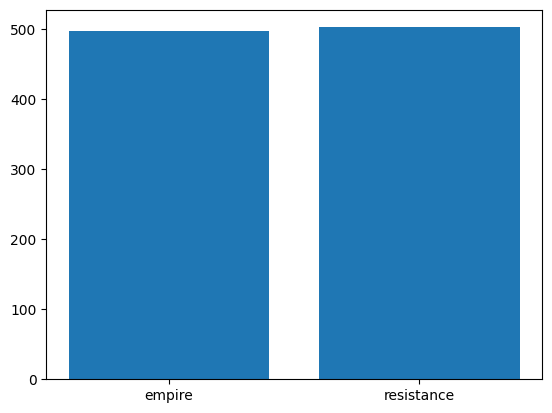

In [26]:
#empire vs resistance bar plot
import matplotlib.pyplot as plt

plt.bar(['empire','resistance'],[df['empire_or_resistance'].str.contains('empire', case=False).sum(),df['empire_or_resistance'].str.contains('resistance', case=False).sum()])
plt.show()

In [47]:
#create prediction model using sklearn.tree.DecisionTreeClassifier to predict empir or resistance based on homeworld and unit type
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

#convert categorical features to numeric using pd.get_dummies
features = pd.get_dummies(df[['homeworld', 'unit_type']])
target = df['is_resistance']

model = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.58

Classification Report:
               precision    recall  f1-score   support

       False       0.57      0.69      0.62       100
        True       0.60      0.47      0.53       100

    accuracy                           0.58       200
   macro avg       0.58      0.58      0.57       200
weighted avg       0.58      0.58      0.57       200



C:\Users\wasadmin\AppData\Local\Temp\2\ipykernel_11180\259541068.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances.head(50), x='Importance', y='Feature', palette="viridis")


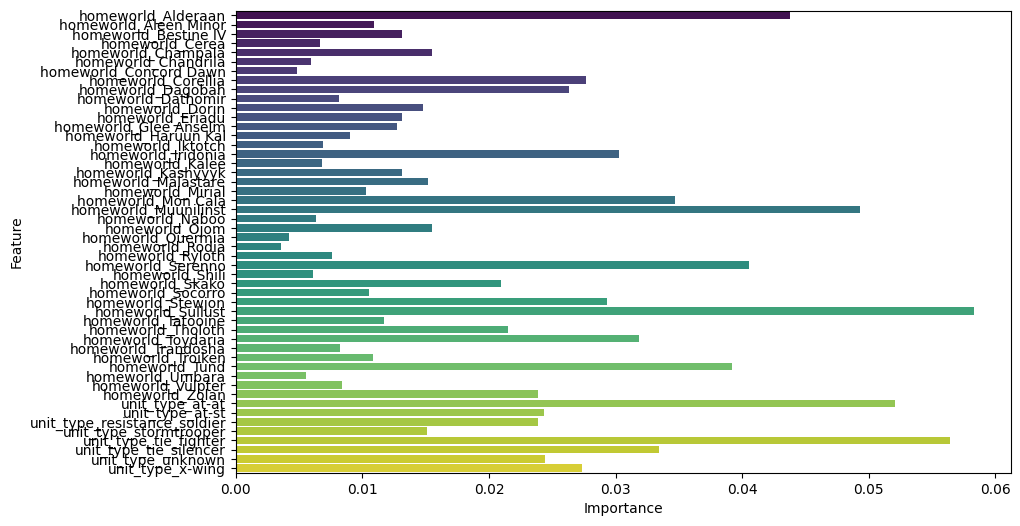

In [48]:
import seaborn as sns

#create a bar plot that shows feature importance
importances = model.feature_importances_

feature_importances = pd.DataFrame({
    'Feature': features.columns,
    'Importance': importances
})

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances.head(50), x='Importance', y='Feature', palette="viridis")
plt.show()

In [40]:
import pickle
#save model as pickle file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [69]:
import pandas as pd  
df = pd.read_csv('troop_movements_1m.csv')



print(df.head())



df['unit_type'] = df['unit_type'].replace('invalid_unit', 'unknown')
print("\n'unit_type' counts after replacing 'invalid_unit':")
print(df['unit_type'].value_counts())



df['location_x'] = df['location_x'].ffill()
df['location_y'] = df['location_y'].ffill()
print("\nNull counts for 'location_x' and 'location_y' after ffill:")
print(df[['location_x', 'location_y']].isnull().sum())



df.to_parquet('troop_movements_1m.parquet', index=False)
print('Cleaned data saved to parquet') 

             timestamp  unit_id     unit_type  location_x  location_y  \
0  2023-06-03 03:19:15   919214  tie_silencer         2.0         5.0   
1  2023-02-24 13:50:40  9467154  stormtrooper         9.0         0.0   
2  2023-03-29 19:54:55  6585778  tie_silencer         0.0         6.0   
3  2023-04-30 00:58:11  3878023  tie_silencer         4.0         2.0   
4  2023-04-10 22:00:26  5537117         at-st         6.0         8.0   

   destination_x  destination_y    homeworld  
0              9              3  Aleen Minor  
1              9              1    Malastare  
2              5              9      Serenno  
3              9              9         Tund  
4              5              8        Skako  

'unit_type' counts after replacing 'invalid_unit':
unit_type
tie_silencer          143216
tie_fighter           142753
at-at                 142724
resistance_soldier    142647
stormtrooper          142611
at-st                 142554
x-wing                142494
unknown       

In [70]:
import pickle
import pandas as pd  

model_filename = 'model.pkl'
loaded_model = pickle.load(open(model_filename, 'rb'))
print(f"Model loaded from {model_filename}")

df_predict = pd.read_parquet('troop_movements_1m.parquet')
print("First 5 rows of the Parquet data for prediction:")
print(df_predict.head())

X_predict = df_predict[['homeworld', 'unit_type']]

X_predict_encoded = pd.get_dummies(df[['homeworld', 'unit_type']])

predictions = loaded_model.predict(X_predict_encoded)
print("Predictions generated.")

df_predict['predictions'] = predictions
print("DataFrame with 'predictions' column:")
print(df_predict.head())

Model loaded from model.pkl
First 5 rows of the Parquet data for prediction:
             timestamp  unit_id     unit_type  location_x  location_y  \
0  2023-06-03 03:19:15   919214  tie_silencer         2.0         5.0   
1  2023-02-24 13:50:40  9467154  stormtrooper         9.0         0.0   
2  2023-03-29 19:54:55  6585778  tie_silencer         0.0         6.0   
3  2023-04-30 00:58:11  3878023  tie_silencer         4.0         2.0   
4  2023-04-10 22:00:26  5537117         at-st         6.0         8.0   

   destination_x  destination_y    homeworld  
0              9              3  Aleen Minor  
1              9              1    Malastare  
2              5              9      Serenno  
3              9              9         Tund  
4              5              8        Skako  
Predictions generated.
DataFrame with 'predictions' column:
             timestamp  unit_id     unit_type  location_x  location_y  \
0  2023-06-03 03:19:15   919214  tie_silencer         2.0         5.0